[A little book of R for bioinformatics chapter7 Computational Gene-finding](https://a-little-book-of-r-for-bioinformatics.readthedocs.io/en/latest/src/chapter7.html)

## The genetic code

In [ ]:
#install.packages("seqinr", repos='http://cran.nexr.com/')

In [1]:
library(seqinr)

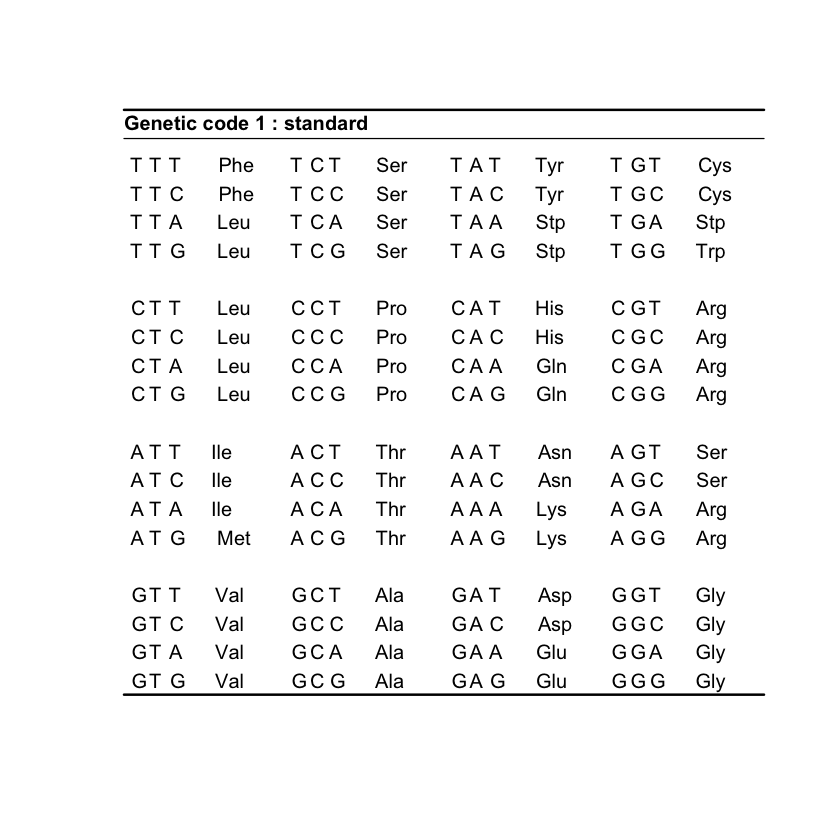

In [2]:
tablecode()

start codon of a gene - “ATG”

stop codon of a gene - “TGA”, “TAA” or “TAG”.

### Finding start and stop codons in a DNA sequence

In [ ]:
#source("https://bioconductor.org/biocLite.R")

In [ ]:
#biocLite("Biostrings")

In [3]:
library("Biostrings")

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit

Loading required package: S4Vectors
Loading required package: stats4

Attaching package: ‘S4Vectors’

The following objects are masked from ‘package:base’:

    c

In [4]:
s1 <- "aaaatgcagtaacccatgccc"
matchPattern("atg", s1) # Find all ATGs in the sequence s1

  Views on a 21-letter BString subject
subject: aaaatgcagtaacccatgccc
views:
    start end width
[1]     4   6     3 [atg]
[2]    16  18     3 [atg]

two “ATG”s in the sequence, at nucleotides 4-6, and at nucleotides 16-18.

findPotentialStartsAndStops() : find all potential start and stop codons in a DNA sequence

In [5]:
findPotentialStartsAndStops <- function(sequence)
{
    # Define a vector with the sequences of potential start and stop codons
    codons <- c("atg", "taa", "tag", "tga")
    # Find the number of occurrences of each type of potential start or stop 
    for (i in 1:4)
    {
        codon <- codons[i]
        # Find all occurrences of codon "codon" in sequence "sequence"
        occurrences <- matchPattern(codon, sequence)
        # Find the start positions of all occurrences of "codon" in sequence "sequence"
        #codonpositions <- attr(occurrences,"start") #error!
        codonpositions <- start(occurrences)
        # Find the total number of potential start and stop codons in sequence "sequence"
        numoccurrences <- length(codonpositions)
        if (i == 1)
        {
            # Make a copy of vector "codonpositions" called "positions"
            positions <- codonpositions
            # Make a vector "types" containing "numoccurrences" copies of "codon"
            types <- rep(codon, numoccurrences)
        }
        else
        {
            # Add the vector "codonpositions" to the end of vector "positions":
            positions <- append(positions, codonpositions, after=length(positions))
            # Add the vector "rep(codon, numoccurrences)" to the end of vector "types":
            types     <- append(types, rep(codon, numoccurrences), after=length(types))
        }
    }
    
    # Sort the vectors "positions" and "types" in order of position along the input sequence:
    indices <- order(positions)
    positions <- positions[indices]
    types <- types[indices]
    # Return a list variable including vectors "positions" and "types":
    mylist <- list(positions, types)
    return(mylist)
}

In [6]:
s1 <- "aaaatgcagtaacccatgccc"
findPotentialStartsAndStops(s1)

[[1]]
[1]  4 10 16

[[2]]
[1] "atg" "taa" "atg"

getncbiseq(): retrieve a sequence for an NCBI accession using the  function

```
# Original code
getncbiseq <- function(accession)
{
    require("seqinr") # this function requires the SeqinR R package
    # first find which ACNUC database the accession is stored in:
    dbs <- c("genbank","refseq","refseqViruses","bacterial")
    numdbs <- length(dbs)
    for (i in 1:numdbs)
    {
        db <- dbs[i]
        choosebank(db)
        # check if the sequence is in ACNUC database 'db':
        resquery <- try(query(".tmpquery", paste("AC=", accession)), silent = TRUE)
        if (!(inherits(resquery, "try-error")))
        {
           queryname <- "query2"
           thequery <- paste("AC=",accession,sep="")
           query(`queryname`,`thequery`)
           # see if a sequence was retrieved:
           seq <- getSequence(query2$req[[1]])
           closebank()
           return(seq)
        }
        closebank()
     }
     print(paste("ERROR: accession",accession,"was not found"))
}
```

In [7]:
#http://www.cs.ukzn.ac.za/~hughm/bio/scripts/script_2_accessing_sequences.R
getncbiseq <- function(accession) {
  require("seqinr") # this function requires the SeqinR R package 
  # first find which ACNUC database the accession is stored in: 
  dbs <- c("genbank","refseqViruses","bacterial")
  numdbs <- length(dbs)
  for (i in 1:numdbs) {
    db <- dbs[i]
    choosebank(db)
    # check if the sequence is in ACNUC database 'db':
    resquery <- try(query(".tmpquery", paste("AC=", accession)), silent = TRUE) 
    if (!(inherits(resquery, "try-error")))
    {
      print(paste("trying: ",db))
      queryname <- "query2"
      thequery <- paste("AC=",accession,sep="") 
      print(thequery)
      query2 <- query(`queryname`,`thequery`) #fixed!
      # see if a sequence was retrieved:
      seq <- getSequence(query2$req[[1]]) 
      closebank()
      return(seq) 
    }
    print(paste("accession not in: ",db))
    closebank()
  }
  print(paste("ERROR: accession",accession,"was not found"))
}


In [8]:
dengueseq <- getncbiseq("NC_001477") #Retrieve a sequence for an NCBI accession using the “getncbiseq()” function

[1] "accession not in:  genbank"
[1] "trying:  refseqViruses"
[1] "AC=NC_001477"


In [9]:
dengueseqstart <- dengueseq[1:500] # Take the first 500 nucleotides of the DEN-1 Dengue sequence
length(dengueseqstart)             # Find the length of the "dengueseqstart" start vector

[1] 500

In [10]:
library("seqinr")                 # Load the SeqinR package
dengueseqstart                    # Print out the vector dengueseqstart

[1] "a" "g" "t" "t" "g" "t" "t" "a" "g" "t" "c" "t" "a" "c" "g" "t" "g" "g"
 [19] "a" "c" "c" "g" "a" "c" "a" "a" "g" "a" "a" "c" "a" "g" "t" "t" "t" "c"
 [37] "g" "a" "a" "t" "c" "g" "g" "a" "a" "g" "c" "t" "t" "g" "c" "t" "t" "a"
 [55] "a" "c" "g" "t" "a" "g" "t" "t" "c" "t" "a" "a" "c" "a" "g" "t" "t" "t"
 [73] "t" "t" "t" "a" "t" "t" "a" "g" "a" "g" "a" "g" "c" "a" "g" "a" "t" "c"
 [91] "t" "c" "t" "g" "a" "t" "g" "a" "a" "c" "a" "a" "c" "c" "a" "a" "c" "g"
[109] "g" "a" "a" "a" "a" "a" "g" "a" "c" "g" "g" "g" "t" "c" "g" "a" "c" "c"
[127] "g" "t" "c" "t" "t" "t" "c" "a" "a" "t" "a" "t" "g" "c" "t" "g" "a" "a"
[145] "a" "c" "g" "c" "g" "c" "g" "a" "g" "a" "a" "a" "c" "c" "g" "c" "g" "t"
[163] "g" "t" "c" "a" "a" "c" "t" "g" "t" "t" "t" "c" "a" "c" "a" "g" "t" "t"
[181] "g" "g" "c" "g" "a" "a" "g" "a" "g" "a" "t" "t" "c" "t" "c" "a" "a" "a"
[199] "a" "g" "g" "a" "t" "t" "g" "c" "t" "t" "t" "c" "a" "g" "g" "c" "c" "a"
[217] "a" "g" "g" "a" "c" "c" "c" "a" "t" "g" "a" "a" "a" "t" "t" "g" "g" "t"
[235] "g" "a" "t" "g" "g" "c" "t" "t" "t" "t" "a" "t" "a" "g" "c" "a" "t" "t"
[253] "c" "c" "t" "a" "a" "g" "a" "t" "t" "t" "c" "t" "a" "g" "c" "c" "a" "t"
[271] "a" "c" "c" "t" "c" "c" "a" "a" "c" "a" "g" "c" "a" "g" "g" "a" "a" "t"
[289] "t" "t" "t" "g" "g" "c" "t" "a" "g" "a" "t" "g" "g" "g" "g" "c" "t" "c"
[307] "a" "t" "t" "c" "a" "a" "g" "a" "a" "g" "a" "a" "t" "g" "g" "a" "g" "c"
[325] "g" "a" "t" "c" "a" "a" "a" "g" "t" "g" "t" "t" "a" "c" "g" "g" "g" "g"
[343] "t" "t" "t" "c" "a" "a" "g" "a" "a" "a" "g" "a" "a" "a" "t" "c" "t" "c"
[361] "a" "a" "a" "c" "a" "t" "g" "t" "t" "g" "a" "a" "c" "a" "t" "a" "a" "t"
[379] "g" "a" "a" "c" "a" "g" "g" "a" "g" "g" "a" "a" "a" "a" "g" "a" "t" "c"
[397] "t" "g" "t" "g" "a" "c" "c" "a" "t" "g" "c" "t" "c" "c" "t" "c" "a" "t"
[415] "g" "c" "t" "g" "c" "t" "g" "c" "c" "c" "a" "c" "a" "g" "c" "c" "c" "t"
[433] "g" "g" "c" "g" "t" "t" "c" "c" "a" "t" "c" "t" "g" "a" "c" "c" "a" "c"
[451] "c" "c" "g" "a" "g" "g" "g" "g" "g" "a" "g" "a" "g" "c" "c" "g" "c" "a"
[469] "c" "a" "t" "g" "a" "t" "a" "g" "t" "t" "a" "g" "c" "a" "a" "g" "c" "a"
[487] "g" "g" "a" "a" "a" "g" "a" "g" "g" "a" "a" "a" "a" "t"

In [11]:
dengueseqstartstring <- c2s(dengueseqstart) # Convert the vector "dengueseqstart" to a string of characters
dengueseqstartstring                        # Print out the variable string of characters "dengueseqstartstring"

[1] "agttgttagtctacgtggaccgacaagaacagtttcgaatcggaagcttgcttaacgtagttctaacagttttttattagagagcagatctctgatgaacaaccaacggaaaaagacgggtcgaccgtctttcaatatgctgaaacgcgcgagaaaccgcgtgtcaactgtttcacagttggcgaagagattctcaaaaggattgctttcaggccaaggacccatgaaattggtgatggcttttatagcattcctaagatttctagccatacctccaacagcaggaattttggctagatggggctcattcaagaagaatggagcgatcaaagtgttacggggtttcaagaaagaaatctcaaacatgttgaacataatgaacaggaggaaaagatctgtgaccatgctcctcatgctgctgcccacagccctggcgttccatctgaccacccgagggggagagccgcacatgatagttagcaagcaggaaagaggaaaat"

In [12]:
findPotentialStartsAndStops(dengueseqstartstring)

[[1]]
 [1]   7  53  58  64  78  93  95  96 137 141 224 225 234 236 246 255 264 295 298
[20] 318 365 369 375 377 378 399 404 413 444 470 471 474 478

[[2]]
 [1] "tag" "taa" "tag" "taa" "tag" "tga" "atg" "tga" "atg" "tga" "atg" "tga"
[13] "tga" "atg" "tag" "taa" "tag" "tag" "atg" "atg" "atg" "tga" "taa" "atg"
[25] "tga" "tga" "atg" "atg" "tga" "atg" "tga" "tag" "tag"

### Reading frames

Potential start and stop codons in a DNA sequence can be in three different possible reading frames.

A potential start/stop codon is said to be in the +1 reading frame if there is an integer number of triplets x between the first nucleotide of the sequence and the start of the start/stop codon. Thus, a potential start/stop codon that begins at nucleotides 1 (0 triplets), 4 (1 triplet), 7 (2 triplets)... will be in the +1 reading frame.

For a potential start and stop codon to be part of the same gene, they must be in the same reading frame.

In [13]:
substring(dengueseqstartstring,137,143)

[1] "atgctga"

As the potential start codon at nucleotide 137 and the potential stop codon at nucleotide 141 are in different reading frames, they are not separated by an integer number of codons, and therefore cannot be part of the same gene.

### Finding open reading frames on the forward strand of a DNA sequence

open reading frame (ORF) : potential start codon followed by a potential stop codon that is in the same reading frame. Good candidate for a potential gene.

In [14]:
plotPotentialStartsAndStops <- function(sequence)
{
     # Define a vector with the sequences of potential start and stop codons
     codons <- c("atg", "taa", "tag", "tga")
     # Find the number of occurrences of each type of potential start or stop codon
     for (i in 1:4)
     {
        codon <- codons[i]
        # Find all occurrences of codon "codon" in sequence "sequence"
        occurrences <- matchPattern(codon, sequence)
        # Find the start positions of all occurrences of "codon" in sequence "sequence"
        #codonpositions <- attr(occurrences,"start")
         codonpositions <- start(occurrences)
        # Find the total number of potential start and stop codons in sequence "sequence"
        numoccurrences <- length(codonpositions)
        if (i == 1)
        {
           # Make a copy of vector "codonpositions" called "positions"
           positions   <- codonpositions
           # Make a vector "types" containing "numoccurrences" copies of "codon"
           types       <- rep(codon, numoccurrences)
        }
        else
        {
           # Add the vector "codonpositions" to the end of vector "positions":
           positions   <- append(positions, codonpositions, after=length(positions))
           # Add the vector "rep(codon, numoccurrences)" to the end of vector "types":
           types       <- append(types, rep(codon, numoccurrences), after=length(types))
        }
     }
     # Sort the vectors "positions" and "types" in order of position along the input sequence:
     indices <- order(positions)
     positions <- positions[indices]
     types <- types[indices]
     # Make a plot showing the positions of the start and stop codons in the input sequence:
     # Draw a line at y=0 from 1 to the length of the sequence:
     x  <- c(1,nchar(sequence))
     y <- c(0,0)
     plot(x, y, ylim=c(0,3), type="l", axes=FALSE, xlab="Nucleotide", ylab="Reading frame",
        main="Predicted start (red) and stop (blue) codons")
     #Draw line segments between pairs of points.
     segments(1,1,nchar(sequence),1)
     segments(1,2,nchar(sequence),2)
     # Add the x-axis at y=0:
     axis(1, pos=0)
     # Add the y-axis labels:
     text(0.9,0.5,"+1")
     text(0.9,1.5,"+2")
     text(0.9,2.5,"+3")
     # Draw in each predicted start/stop codon:
     numcodons <- length(positions)
     for (i in 1:numcodons)
     {
        position <- positions[i]
        type <- types[i]
        remainder <- (position-1) %% 3
        if    (remainder == 0) # +1 reading frame
        {
           if (type == "atg") { segments(position,0,position,1,lwd=1,col="red") }
           else               { segments(position,0,position,1,lwd=1,col="blue")}
        }
        else if (remainder == 1)
        {
           if (type == "atg") { segments(position,1,position,2,lwd=1,col="red") }
           else               { segments(position,1,position,2,lwd=1,col="blue")}
        }
        else if (remainder == 2)
        {
           if (type == "atg") { segments(position,2,position,3,lwd=1,col="red") }
           else               { segments(position,2,position,3,lwd=1,col="blue")}
        }
     }
}


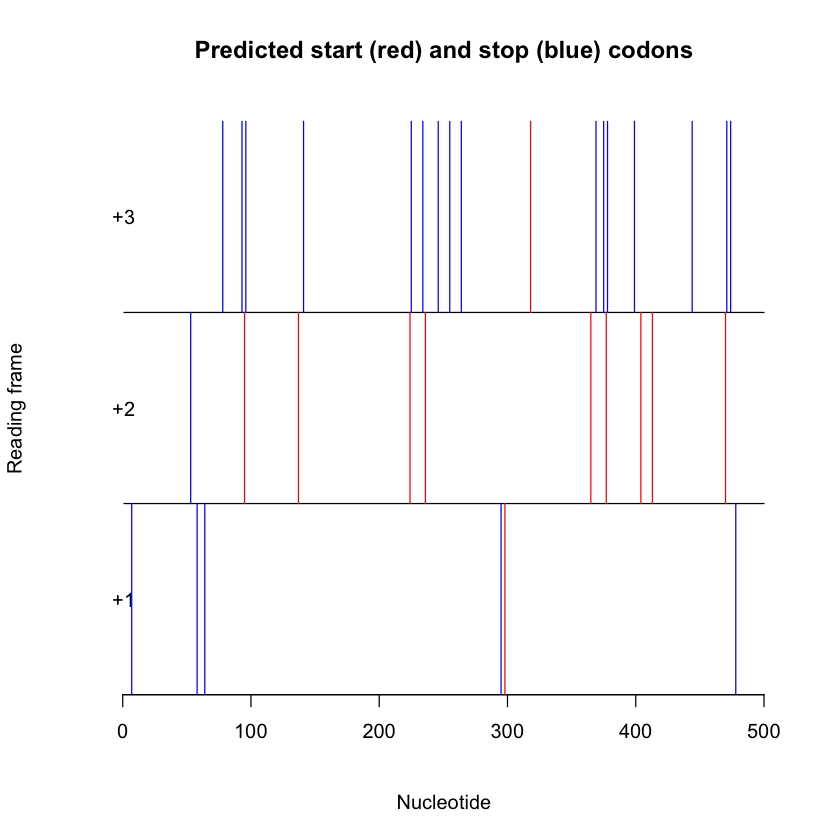

In [15]:
plotPotentialStartsAndStops(dengueseqstartstring)

In [16]:
findORFsinSeq <- function(sequence)
{
     require(Biostrings)
     # Make vectors "positions" and "types" containing information on the positions of ATGs in the sequence:
     mylist <- findPotentialStartsAndStops(sequence)
     positions <- mylist[[1]]
     types <- mylist[[2]]
     # Make vectors "orfstarts" and "orfstops" to store the predicted start and stop codons of ORFs
     orfstarts <- numeric()
     orfstops <- numeric()
     # Make a vector "orflengths" to store the lengths of the ORFs
     orflengths <- numeric()
     # Print out the positions of ORFs in the sequence:
     # Find the length of vector "positions"
     numpositions <- length(positions)
     # There must be at least one start codon and one stop codon to have an ORF.
     if (numpositions >= 2)
     {
        for (i in 1:(numpositions-1))
        {
           posi <- positions[i]
           typei <- types[i]
           found <- 0
           while (found == 0)
           {
              for (j in (i+1):numpositions)
              {
                 posj  <- positions[j]
                 typej <- types[j]
                 posdiff <- posj - posi
                 posdiffmod3 <- posdiff %% 3
                 # Add in the length of the stop codon
                 orflength <- posj - posi + 3
                 if (typei == "atg" && (typej == "taa" || typej == "tag" || typej == "tga") && posdiffmod3 == 0)
                 {
                    # Check if we have already used the stop codon at posj+2 in an ORF
                    numorfs <- length(orfstops)
                    usedstop <- -1
                    if (numorfs > 0)
                    {
                      for (k in 1:numorfs)
                      {
                          orfstopk <- orfstops[k]
                          if (orfstopk == (posj + 2)) { usedstop <- 1 }
                      }
                    }
                    if (usedstop == -1)
                    {
                       orfstarts <- append(orfstarts, posi, after=length(orfstarts))
                       orfstops <- append(orfstops, posj+2, after=length(orfstops)) # Including the stop codon.
                       orflengths <- append(orflengths, orflength, after=length(orflengths))
                    }
                    found <- 1
                    break
                 }
                 if (j == numpositions) { found <- 1 }
              }
           }
        }
     }
     # Sort the final ORFs by start position:
     indices <- order(orfstarts)
     orfstarts <- orfstarts[indices]
     orfstops <- orfstops[indices]
     # Find the lengths of the ORFs that we have
     orflengths <- numeric()
     numorfs <- length(orfstarts)
     for (i in 1:numorfs)
     {
        orfstart <- orfstarts[i]
        orfstop <- orfstops[i]
        orflength <- orfstop - orfstart + 1
        orflengths <- append(orflengths,orflength,after=length(orflengths))
     }
     mylist <- list(orfstarts, orfstops, orflengths)
     return(mylist)
}

In [17]:
s1 <- "aaaatgcagtaacccatgccc"
findORFsinSeq(s1)

[[1]]
[1] 4

[[2]]
[1] 12

[[3]]
[1] 9

The function findORFsinSeq() returns a list variable.
Each element have a vector of the start/end positions and lengths of ORFs, respectively

In [18]:
findORFsinSeq(dengueseqstartstring)

[[1]]
[1] 298 318

[[2]]
[1] 480 371

[[3]]
[1] 183  54

Two ORFs in the first 500 nucleotides of the DEN-1 Dengue virus genome, at nucleotides 298-480 (start codon at 298-300, stop codon at 478-480), and 318-371 (start codon at 318-320, stop codon at 369-371).

In [19]:
plotORFsinSeq <- function(sequence)
{
     # Make vectors "positions" and "types" containing information on the positions of ATGs in the sequence:
     mylist <- findPotentialStartsAndStops(sequence)
     positions <- mylist[[1]]
     types <- mylist[[2]]
     # Make vectors "orfstarts" and "orfstops" to store the predicted start and stop codons of ORFs
     orfstarts <- numeric()
     orfstops <- numeric()
     # Make a vector "orflengths" to store the lengths of the ORFs
     orflengths <- numeric()
     # Print out the positions of ORFs in the sequence:
     numpositions <- length(positions) # Find the length of vector "positions"
     # There must be at least one start codon and one stop codon to have an ORF.
     if (numpositions >= 2)
     {
        for (i in 1:(numpositions-1))
        {
           posi <- positions[i]
           typei <- types[i]
           found <- 0
           while (found == 0)
           {
              for (j in (i+1):numpositions)
              {
                 posj <- positions[j]
                 typej <- types[j]
                 posdiff <- posj - posi
                 posdiffmod3 <- posdiff %% 3
                 orflength <- posj - posi + 3 # Add in the length of the stop codon
                 if (typei == "atg" && (typej == "taa" || typej == "tag" || typej == "tga") && posdiffmod3 == 0)
                 {
                    # Check if we have already used the stop codon at posj+2 in an ORF
                    numorfs <- length(orfstops)
                    usedstop <- -1
                    if (numorfs > 0)
                    {
                       for (k in 1:numorfs)
                       {
                          orfstopk <- orfstops[k]
                          if (orfstopk == (posj + 2)) { usedstop <- 1 }
                       }
                    }
                    if (usedstop == -1)
                    {
                       orfstarts <- append(orfstarts, posi, after=length(orfstarts))
                       orfstops <- append(orfstops, posj+2, after=length(orfstops)) # Including the stop codon.
                       orflengths <- append(orflengths, orflength, after=length(orflengths))
                    }
                    found <- 1
                    break
                 }
                 if (j == numpositions) { found <- 1 }
              }
           }
        }
     }
     # Sort the final ORFs by start position:
     indices <- order(orfstarts)
     orfstarts <- orfstarts[indices]
     orfstops <- orfstops[indices]
     # Make a plot showing the positions of ORFs in the input sequence:
     # Draw a line at y=0 from 1 to the length of the sequence:
     x <- c(1,nchar(sequence))
     y <- c(0,0)
     plot(x, y, ylim=c(0,3), type="l", axes=FALSE, xlab="Nucleotide", ylab="Reading frame", main="Predicted ORFs")
     segments(1,1,nchar(sequence),1)
     segments(1,2,nchar(sequence),2)
     # Add the x-axis at y=0:
     axis(1, pos=0)
     # Add the y-axis labels:
     text(0.9,0.5,"+1")
     text(0.9,1.5,"+2")
     text(0.9,2.5,"+3")
     # Make a plot of the ORFs in the sequence:
     numorfs <- length(orfstarts)
     for (i in 1:numorfs)
     {
        orfstart <- orfstarts[i]
        orfstop <- orfstops[i]
        remainder <- (orfstart-1) %% 3
        if    (remainder == 0) # +1 reading frame
        {
           rect(orfstart,0,orfstop,1,col="cyan",border="black")
        }
        else if (remainder == 1)
        {
           rect(orfstart,1,orfstop,2,col="cyan",border="black")
        }
        else if (remainder == 2)
        {
           rect(orfstart,2,orfstop,3,col="cyan",border="black")
        }
     }
}

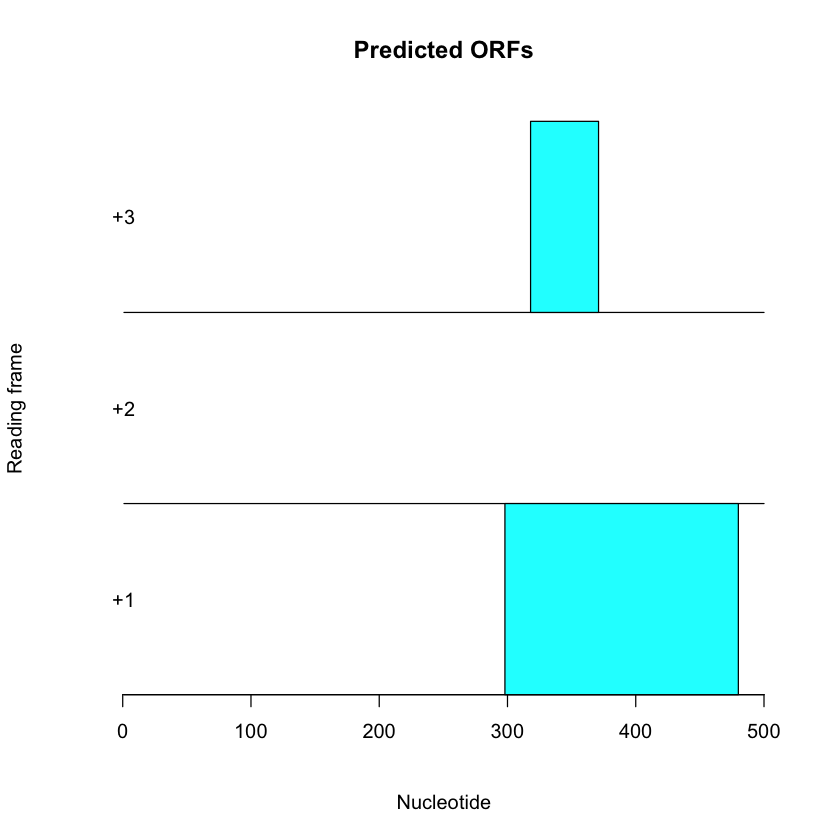

In [20]:
plotORFsinSeq(dengueseqstartstring)

ORFs in the +3, +1 reading frame
No potential stop codons to the right (3’) of the potential start codons in the +2 reading frame as there are no potential stop codons to the right (3’) of the potential start codons.

### Predicting the protein sequence for an ORF

In [21]:
s1 <- "aaaatgcagtaacccatgccc"
myorf <- substring(s1, 4, 12)
myorf # Print out the sequence of "myorf"

[1] "atgcagtaa"

In [22]:
myorfvector <- s2c(myorf) # Convert the sequence of characters to a vector
myorfvector               # Print out the value of "myorfvector"

[1] "a" "t" "g" "c" "a" "g" "t" "a" "a"

In [23]:
seqinr::translate(myorfvector) #Use the SeqinR translate() function

[1] "M" "Q" "*"

### Finding open reading frames on the reverse strand of a DNA sequence

In [24]:
forward <- "AAAATGCTTAAACCATTGCCC"
forwardvector <- s2c(forward)       # Convert the string of characters to a vector
forwardvector                       # Print out the vector containing the forward strand sequence

[1] "A" "A" "A" "A" "T" "G" "C" "T" "T" "A" "A" "A" "C" "C" "A" "T" "T" "G" "C"
[20] "C" "C"

In [25]:
reversevector <- rev(comp(forwardvector))  # Find the reverse strand sequence, by finding the reverse complement
reversevector                              # Print out the vector containing the reverse strand sequence 

[1] "g" "g" "g" "c" "a" "a" "t" "g" "g" "t" "t" "t" "a" "a" "g" "c" "a" "t" "t"
[20] "t" "t"

In [26]:
reverse <- c2s(reversevector)       # Convert the vector to a string of characters
reverse # Print out the string of characters containing the reverse strand sequence

[1] "gggcaatggtttaagcatttt"

In [27]:
complement <- comp(forwardvector) # Find the complement of the forward strand sequence
reversevector <- rev(complement)  # Reverse the order of the letters in sequence "complement", to
                                  # find the reverse strand sequence (the reverse complement sequence)

In [28]:
findORFsinSeq(reverse) 

[[1]]
[1] 6

[[2]]
[1] 14

[[3]]
[1] 9

One ORF of length 9 bp in the reverse strand of sequence “AAAATGCTTAAACCATTGCCC”, that has a predicted start codon that starts at nucleotide 6 in the reverse strand sequence and a predicted stop codon that ends at nucleotide 14 in the reverse strand sequence.

### Lengths of open reading frames

A random DNA sequence the probability that any codon is a potential stop codon is 3/64, or about 1/21 (about 5%).

An open reading frame (ORF) is just a gene prediction, or a potential gene. It may correspond to a real gene (may be a true positive gene prediction), but it may not (may be a false positive gene prediction).

Long ORFs that are hundreds of codons long are unlikely to occur due to chance alone, and therefore we can be fairly confident that such long ORFs probably correspond to real genes.

### Identifying significant open reading frames

By looking at the lengths of ORFs in the random sequence, we can see what is the longest ORF that is likely to occur by chance alone.

generateSeqsWithMultinomialModel() to generate random sequences using a multinomial model in which the probability of each letter is set equal to the fraction of an input sequence that consists of that letter.

In [29]:
generateSeqsWithMultinomialModel <- function(inputsequence, X)
{
     # Change the input sequence into a vector of letters
     require("seqinr") # This function requires the SeqinR package.
     inputsequencevector <- s2c(inputsequence)
     # Find the frequencies of the letters in the input sequence "inputsequencevector":
     mylength <- length(inputsequencevector)
     mytable <- table(inputsequencevector)
     # Find the names of the letters in the sequence
     letters <- rownames(mytable)
     numletters <- length(letters)
     probabilities <- numeric() # Make a vector to store the probabilities of letters
     for (i in 1:numletters)
     {
        letter <- letters[i]
        count <- mytable[[i]]
        probabilities[i] <- count/mylength
     }
     # Make X random sequences using the multinomial model with probabilities "probabilities"
     seqs <- numeric(X)
     for (j in 1:X)
     {
        seq <- sample(letters, mylength, rep=TRUE, prob=probabilities) # Sample with replacement
        seq <- c2s(seq)
        seqs[j] <- seq
     }
     # Return the vector of random sequences
     return(seqs)
}

In [30]:
myseq    <- "AAAATGCTTAAACCATTGCCC"
generateSeqsWithMultinomialModel(myseq, 1) # Generate one random sequence using the multinomial model

[1] "CAAATAAAACAAGAACTCTAA"

In [31]:
dengueseqstring <- c2s(dengueseq)           # Convert the Dengue sequence to a string of characters
mylist <- findORFsinSeq(dengueseqstring)    # Find ORFs in "dengueseqstring"
orflengths <- mylist[[3]]                   # Find the lengths of ORFs in "dengueseqstring"
randseqs <- generateSeqsWithMultinomialModel(dengueseqstring, 10) # Generate 10 random sequences using the multinomial model
randseqorflengths <- numeric()              # Tell R that we want to make a new vector of numbers
for (i in 1:10)
{
     print(i)
     randseq <- randseqs[i]                     # Get the ith random sequence
     mylist <- findORFsinSeq(randseq)           # Find ORFs in "randseq"
     lengths <- mylist[[3]]                     # Find the lengths of ORFs in "randseq"
     randseqorflengths <- append(randseqorflengths, lengths, after=length(randseqorflengths))
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


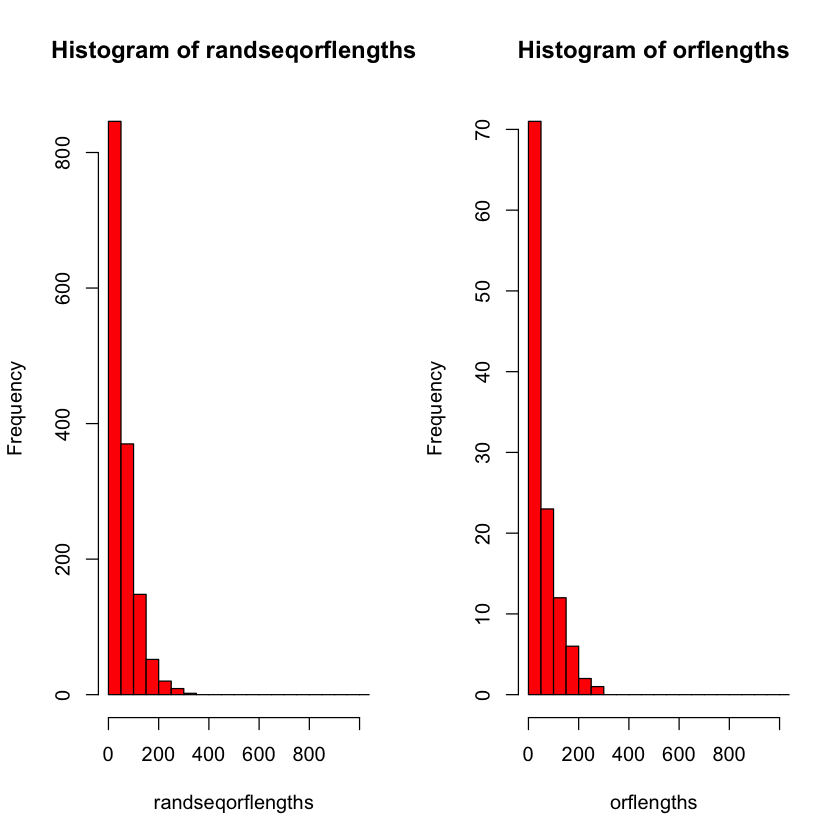

In [32]:
par(mfrow = c(1,2))                      # Make a picture with two plots side-by-side (one row, two columns)
bins <- seq(0,11000,50)                  # Set the bins for the histogram
hist(randseqorflengths, breaks=bins, col="red", xlim=c(0,1000))
hist(orflengths, breaks=bins, col="red", xlim=c(0,1000))

The histogram of the lengths of the ORFs in the 10 random sequences gives us an idea of the length distribution of ORFs that you would expect by chance alone in a random DNA sequence (generated by a multinomial model in which the probabilities of the four bases are set equal to their frequencies in the DEN-1 Dengue virus genome sequence).

In [33]:
max(randseqorflengths)

[1] 348

In [34]:
summary(orflengths > max(randseqorflengths))

   Mode   FALSE    TRUE    NA's 
logical     115       1       0 

In [35]:
quantile(randseqorflengths, probs=c(0.99))

99% 
225

The longest of the longest 99% of ORFs in the random sequences is 225 nucleotides.

### Summary
R functions belong to the standard installation of R:
```
1. substring() for cutting out a substring of a string of characters (eg. a subsequence of a DNA sequence)
2. rev() for reversing the order of the elements in a vector
3. hist() to make a histogram plot
4. max() to find the largest element in a vector of numbers
5. quantile() to find quantiles of a set of numbers that correspond to particular probabilities
```
bioinformatics packages:
```
1. tablecode() in the SeqinR package for viewing the genetic code
2. MatchPattern() in the Biostrings package for finding all occurrences of a motif in a sequence
3. translate() in the SeqinR package to get the predicted protein sequence for an ORF
4. s2c() in the SeqinR package to convert a sequence stored as a string of characters into a vector
5. c2s() in the SeqinR package to convert a sequence stored in a vector into a string of characters
6. comp() in the SeqinR package to find the complement of a DNA sequence
```

### Links and Further Reading

For background reading on computational gene-finding, it is recommended to read Chapter 2 of Introduction to Computational Genomics: a case studies approach by Cristianini and Hahn (Cambridge University Press; [www.computational-genomics.net/book/](www.computational-genomics.net/book/)).

For more in-depth information and more examples on using the SeqinR package for sequence analysis, look at the SeqinR documentation, http://pbil.univ-lyon1.fr/software/seqinr/doc.php?lang=eng.

For more information on and examples using the Biostrings package, see the Biostrings documentation at http://www.bioconductor.org/packages/release/bioc/html/Biostrings.html.

There is also a very nice chapter on “Analyzing Sequences”, which includes examples of using the SeqinR and Biostrings packages for sequence analysis, in the book Applied statistics for bioinformatics using R by Krijnen (available online at [cran.r-project.org/doc/contrib/Krijnen-IntroBioInfStatistics.pdf](cran.r-project.org/doc/contrib/Krijnen-IntroBioInfStatistics.pdf)).

For a more in-depth introduction to R, a good online tutorial is available on the “Kickstarting R” website, [cran.r-project.org/doc/contrib/Lemon-kickstart](cran.r-project.org/doc/contrib/Lemon-kickstart).

There is another nice (slightly more in-depth) tutorial to R available on the “Introduction to R” website, [cran.r-project.org/doc/manuals/R-intro.html](cran.r-project.org/doc/manuals/R-intro.html).


### Exercises
Q1. How many ORFs are there on the forward strand of the DEN-1 Dengue virus genome (NCBI accession NC_001477)?

In [36]:
#findORFsinSeq() function to find ORFs on the forward strand of the DEN-1 Dengue virus sequence
dengueseqstring <- c2s(dengueseq)           # Convert the Dengue sequence to a string of characters
mylist <- findORFsinSeq(dengueseqstring)    # Find ORFs in "dengueseqstring"
orflengths <- mylist[[3]]                   # Find the lengths of ORFs in "dengueseqstring"
length(orflengths)                          # Find the number of ORFs that were found

[1] 116

Q2. What are the coordinates of the rightmost (most 3’, or last) ORF in the forward strand of the DEN-1 Dengue virus genome?

In [37]:
# Get the coordinates of the ORFs in the DEN-1 Dengue virus genome
dengueseqstring <- c2s(dengueseq)           # Convert the Dengue sequence to a string of characters
mylist <- findORFsinSeq(dengueseqstring)    # Find ORFs in "dengueseqstring"
starts <- mylist[[1]]                       # Start positions of ORFs
stops <- mylist[[2]]                        # Stop positions of ORFs

In [38]:
starts[length(orflengths)]

[1] 10705

In [39]:
stops[length(orflengths)]

[1] 10722

=> The coordinates of the 3’-most ORF are 10705-10722

Q3. What is the predicted protein sequence for the rightmost (most 3’, or last) ORF in the forward strand of the DEN-1 Dengue virus genome?

In [40]:
myorfvector <- dengueseq[10705:10722] # Get the DNA sequence of the ORF
seqinr::translate(myorfvector)

[1] "M" "E" "W" "C" "C" "*"

Q4. How many ORFs are there of 30 nucleotides or longer in the forward strand of the DEN-1 Dengue virus genome sequence?

In [41]:
dengueseqstring <- c2s(dengueseq)           # Convert the Dengue sequence to a string of characters
mylist <- findORFsinSeq(dengueseqstring)    # Find ORFs in "dengueseqstring"
orflengths <- mylist[[3]]                   # Find the lengths of ORFs in "dengueseqstring"
summary(orflengths >= 30)

   Mode   FALSE    TRUE    NA's 
logical      54      62       0 

Q5. How many ORFs longer than 248 nucleotides are there in the forward strand of the DEN-1 Dengue genome sequence?

In [42]:
summary(orflengths >= 248)

   Mode   FALSE    TRUE    NA's 
logical     114       2       0 

Q6. If an ORF is 248 nucleotides long, what length in amino acids will its predicted protein sequence be?

If we include the predicted stop codon in the length of the ORF, it means that the last three bases of the ORF are not coding for any amino acid. Therefore, the length of the ORF that is coding for amino acids is 245 bp. Each amino acid is coded for by 3 bp, so there can be 245/3 = 81 amino acids. Thus, the predicted protein sequence will be 81 amino acids long.

Q7. How many ORFs are there on the forward strand of the rabies virus genome (NCBI accession NC_001542)?
Note: rabies virus is the virus responsible for rabies, which is classified by the WHO as a neglected tropical disease.

In [43]:
rabiesseq <- getncbiseq("NC_001542")
rabiesseqstring <- c2s(rabiesseq)           # Convert the rabies sequence to a string of characters
rabieslist <- findORFsinSeq(rabiesseqstring)# Find ORFs in "rabiesseqstring"
rabiesorflengths <- rabieslist[[3]]         # Find the lengths of ORFs in "rabiesseqstring"
length(rabiesorflengths)                    # Find the number of ORFs that were found

[1] "accession not in:  genbank"
[1] "trying:  refseqViruses"
[1] "AC=NC_001542"


[1] 111

=> 111 ORFs on the forward strand.

Q8. What is the length of the longest ORF among the 99% of longest ORFs in 10 random sequences of the same lengths and composition as the rabies virus genome sequence?

Generate 10 random sequences using a multinomial model in which the probabilities of the 4 bases are set equal to their frequencies in the rabies sequence:

In [44]:
randseqs <- generateSeqsWithMultinomialModel(rabiesseqstring, 10) # Generate 10 random sequences using the multinomial model
randseqorflengths <- numeric()              # Tell R that we want to make a new vector of numbers
for (i in 1:10)
{
    print(i)
    randseq <- randseqs[i]                    # Get the ith random sequence
    mylist <- findORFsinSeq(randseq)          # Find ORFs in "randseq"
    lengths <- mylist[[3]]                    # Find the lengths of ORFs in "randseq"
    randseqorflengths <- append(randseqorflengths, lengths, after=length(randseqorflengths))
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


To find the length of the longest ORF among the 99% of the longest ORFs in the 10 random sequences, we find the 99th quantile of randomseqorflengths:

In [45]:
quantile(randseqorflengths, probs=c(0.99))

99% 
234.27

That is, the longest of the longest 99% of ORFs in the random sequences is 234 nucleotides.

Q9. How many ORFs are there in the rabies virus genome that are longer than the threshold length that you found in Q8?

In [46]:
summary(rabiesorflengths > quantile(randseqorflengths, probs=c(0.99)))

   Mode   FALSE    TRUE    NA's 
logical     105       6       0 

There are 6 ORFs in the rabies virus genome that are longer than the threshold length found in Q8 (234 nucleotides).